In [3]:
# Importaciones necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

In [4]:
# Nos encontramos un fichero por año, incluso algún año está "partido" en dos ficheros.
# Veamos uno de ellos
! cat "Ficheros/Flare/xray-flares_1992.txt" | head











cat: write error: Broken pipe


In [5]:
# Lo más práctico será unir todos y tratar el resultado
! cat Ficheros/Flare/*.txt > flare_all.txt 

In [6]:
# Echamos un vistazo al fichero resultante
! cat flare_all.txt

SELDADS X-RAY Data for 2012-01-01
120101G150445045004574.5E-078.1E-074.4E-04
120101G150724073407447.4E-073.2E-062.8E-03
120101G151322132613335.2E-078.0E-074.1E-04
120101G151854185919065.5E-078.9E-074.9E-04
120101G152328233623466.5E-071.3E-061.1E-03
120102G150255030003075.2E-077.6E-074.3E-04
120102G150523052805347.3E-071.6E-067.8E-04
120102G150705072407325.2E-071.5E-061.6E-03
120102G150756080208095.2E-078.4E-075.1E-04
120102G150927093009324.2E-076.1E-071.0E-04
120102G151111111811264.5E-078.2E-075.8E-04
120102G151431152416045.1E-072.4E-068.7E-03
120103G150331033403384.4E-076.7E-071.8E-04
120103G150414041904274.6E-078.0E-074.7E-04
120103G152050205320554.3E-077.7E-071.1E-04
120104G150219022202264.5E-076.4E-071.8E-04
120104G150857090209055.0E-071.5E-064.6E-04
120104G151059110611144.8E-071.3E-068.2E-04
120105G150701072207435.2E-071.9E-063.8E-03
120105G151151123813005.1E-072.1E-066.6E-03
120106G150604060806117.2E-071.4E-063.6E-04
120106G151114112511355.5E-072.2E-062.0E-03
120106G1517031706170

120523G151102110811154.2E-077.1E-074.3E-04
120524G151133113711436.4E-071.1E-064.9E-04
120524G151607161116154.8E-079.0E-072.9E-04
120524G151733173717396.0E-079.8E-072.1E-04
120524G151841184518495.2E-071.3E-064.3E-04
120524G151957200920148.1E-073.9E-061.1E-03
120525G150156020102057.3E-071.5E-065.7E-04
120525G151009101410225.8E-071.6E-069.0E-04
120525G151054110111085.7E-071.3E-068.0E-04
120525G151124112711336.6E-079.5E-073.7E-04
120525G151549155516054.5E-071.4E-061.0E-03
120525G151953195820005.5E-072.0E-064.3E-04
120525G152002200720097.3E-072.0E-064.4E-04
120525G152307231023127.6E-071.1E-061.8E-04
120526G150136013902195.3E-078.6E-071.9E-03
120526G150438044204444.8E-078.2E-071.7E-04
120526G150539054205444.1E-075.7E-078.7E-05
120526G150604060706093.8E-076.6E-079.7E-05
120526G150905091409184.2E-071.5E-067.2E-04
120526G151110111411184.5E-076.8E-072.3E-04
120526G151604161016134.6E-072.7E-068.7E-04
120526G151826182918323.9E-075.7E-071.3E-04
120526G151848185619033.3E-076.3E-074.3E-04
120526G1521

131113G150351035804039.6E-076.5E-063.0E-03
131113G150433044204451.8E-062.6E-061.7E-03
131113G150908091309179.5E-072.4E-068.3E-04
131113G151007103510391.4E-063.5E-064.8E-03
131113G151153120712121.0E-062.3E-062.0E-03
131113G151312131713211.9E-062.6E-061.4E-03
131113G151457152015411.2E-061.4E-052.1E-02
131113G151748175618061.3E-064.0E-063.1E-03
131113G151935194019448.5E-071.0E-065.9E-04
131113G152019204220589.1E-075.9E-061.0E-02
131113G152253225923048.4E-072.3E-061.0E-03
131113G152305230823111.3E-063.1E-066.4E-04
131114G150016002000241.0E-061.9E-066.1E-04
131114G150101011201211.4E-062.3E-062.5E-03
131114G150132014001491.6E-063.2E-062.6E-03
131114G150214021702201.2E-062.5E-065.3E-04
131114G150343034803521.1E-061.7E-069.3E-04
131114G150443044704519.8E-071.5E-065.0E-04
131114G150543055205581.0E-061.6E-061.4E-03
131114G150643064606509.4E-073.5E-068.4E-04
131114G150750080008081.3E-064.9E-063.7E-03
131114G150855090609181.3E-063.0E-063.3E-03
131114G151245124912521.3E-062.3E-066.4E-04
131114G1514

150301G150504051305218.7E-073.7E-062.6E-03
150301G150855095610213.9E-077.4E-071.7E-03
150301G151533161316316.8E-076.8E-061.3E-02
150302G150140014701575.9E-071.1E-069.3E-04
150302G150234030103077.3E-072.3E-062.9E-03
150302G150340034303457.4E-071.3E-062.0E-04
150302G150513051805261.0E-062.5E-061.4E-03
150302G150550055506048.1E-073.0E-061.7E-03
150302G150631063906447.5E-071.0E-054.6E-03
150302G150704071007201.8E-063.2E-062.5E-03
150302G150743074807541.5E-065.2E-062.3E-03
150302G150837084108491.7E-063.2E-061.7E-03
150302G151024103410583.4E-065.5E-061.0E-02
150302G151259130713132.2E-063.4E-062.3E-03
150302G151407141314211.2E-062.1E-061.4E-03
150302G151510152815372.2E-063.7E-053.1E-02
150302G151723173717511.4E-063.9E-065.1E-03
150302G151921193119361.0E-064.1E-051.9E-02
150302G152259231623311.2E-066.0E-067.7E-03
150303G150017002700349.7E-073.5E-062.5E-03
150303G150125013501421.6E-068.2E-054.4E-02
150303G150608063406459.5E-071.9E-063.3E-03
150303G150744075007558.7E-071.3E-067.0E-04
150303G1308























































































































































































































































































































































































































































































































































































970120GO80827083308489.4E-094.2E-073.4E-04
970127GO81421142514309.6E-091.4E-074.9E-05
970129GO81841184718535.2E-081.2E-077.5E-05
970202GO80428043904495.6E-083.2E-073.0E-04
970202GO80610064006481.3E-088.4E-071.1E-03
970202GO80832084208556.8E-083.9E-074.0E-04
970202GO80940094509547.0E-083.4E-072.0E-04
970202GO81128113111338.8E-081.5E-073.6E-05
970202GO81134113711401.0E-071.5E-074.8E-05
970202GO81457150015069.8E-081.5E-077.2E-05
970

981209GO81114113211401.4E-063.1E-064.2E-03
981209GO81734174017459.2E-076.0E-062.3E-03
981209GO81801180618101.7E-063.2E-061.4E-03
981209GO82055210021077.5E-071.3E-068.0E-04
981209GO82210221622276.9E-071.1E-069.8E-04
981210GO80743080808197.7E-071.4E-062.7E-03
981210GO82343234823515.4E-079.3E-073.8E-04
981211GO81739174917589.1E-073.4E-062.8E-03
981211GO82007201120147.8E-071.1E-064.2E-04
981212GO80422042804316.3E-071.1E-065.1E-04
981212GO80509051305156.6E-071.1E-063.0E-04
981212GO81918192219268.0E-071.4E-065.5E-04
981212GO82108211221141.0E-062.5E-066.3E-04
981212GO82317232023228.3E-071.7E-064.0E-04
981212GO82323232823321.1E-063.1E-061.2E-03
981213GO80148015601587.8E-072.8E-069.2E-04
981213GO80323033103376.6E-071.8E-061.2E-03
981213GO80430043604456.7E-071.4E-061.0E-03
981213GO80512051605189.0E-073.1E-067.3E-04
981213GO80707071207157.6E-075.5E-061.3E-03
981213GO81030103510417.0E-073.8E-061.7E-03
981213GO81845185519086.2E-071.2E-061.5E-03
981213GO82018202220256.8E-071.3E-064.3E-04
981213GO820

000721GO81828183718512.4E-066.9E-067.8E-03
000721GO82017202120233.0E-064.4E-061.4E-03
000721GO82038204720593.9E-069.1E-069.5E-03
000721GO82240224822582.8E-068.6E-066.8E-03
000721GO82331000100063.3E-063.4E-052.7E-02
000722GO80416042204264.2E-067.3E-063.7E-03
000722GO80615062106263.0E-068.4E-064.0E-03
000722GO80652071107242.3E-061.1E-051.4E-02
000722GO80901090709132.7E-066.0E-063.5E-03
000722GO81117113412023.8E-063.7E-057.0E-02
000722GO81648165316583.4E-066.4E-063.2E-03
000723GO80122012501291.9E-062.8E-061.1E-03
000723GO80534053705411.9E-062.9E-061.1E-03
000723GO80913092609421.6E-064.6E-066.3E-03
000723GO80951100010132.9E-061.5E-051.3E-02
000723GO81359141314333.5E-061.1E-051.7E-02
000723GO81748180118091.3E-066.0E-065.4E-03
000724GO80147015102021.9E-063.7E-062.8E-03
000724GO80815081908261.5E-062.3E-061.3E-03
000724GO81555160016211.8E-062.8E-063.8E-03
000724GO81957200220051.8E-063.8E-061.4E-03
000724GO82228223422371.6E-065.2E-061.8E-03
000725GO80243024902541.7E-068.0E-052.8E-02
000725GO804

020402GO80224023202421.8E-065.4E-064.4E-03
020402XXX0224023202421.8E-065.6E-064.6E-03
020402XXX0431043404391.8E-066.0E-062.0E-03
020402XXX0742074607511.7E-062.5E-061.2E-03
020402GO81026103810491.4E-062.3E-062.9E-03
020402XXX1026103910491.4E-062.3E-062.9E-03
020402GO81315132213331.0E-064.0E-063.3E-03
020402XXX1315132213339.9E-074.1E-063.3E-03
020402GO81404140914221.1E-063.4E-062.9E-03
020402XXX1404140914221.1E-063.4E-062.9E-03
020402GO81541154615521.2E-062.6E-061.4E-03
020402XXX1541154615521.1E-062.6E-061.4E-03
020402GO81656170117068.9E-072.8E-061.2E-03
020402XXX1656170117068.6E-072.9E-061.2E-03
020402GO81734173817438.9E-071.4E-066.5E-04
020402XXX1734173817438.6E-071.4E-066.4E-04
020402GO81844184718501.1E-061.8E-065.2E-04
020402XXX1844184718501.0E-061.8E-065.2E-04
020402GO81900190419071.6E-062.3E-068.7E-04
020402XXX1900190419071.6E-062.3E-068.8E-04
020402GO81955200720187.9E-073.1E-063.1E-03
020402XXX1955200720187.7E-073.2E-063.2E-03
020402GO82059210221049.1E-071.4E-063.6E-04
020402XXX20

021213GO81325133213382.0E-068.0E-064.6E-03
021213XXX1325133213381.9E-068.0E-064.5E-03
021213GO81527153215371.1E-061.7E-069.2E-04
021213XXX1527153215371.1E-061.6E-069.0E-04
021213GO81710172517381.2E-066.8E-068.2E-03
021213XXX1710172517381.2E-066.7E-068.0E-03
021214GO80827084308461.4E-063.9E-063.2E-03
021214XXX0827084308461.3E-063.9E-063.1E-03
021214GO81158120112031.2E-062.1E-064.9E-04
021214XXX1158120112031.2E-062.0E-064.7E-04
021214GO82030203520581.2E-062.1E-063.0E-03
021214XXX2030203520581.2E-062.1E-062.9E-03
021215GO80406041004131.6E-062.5E-069.1E-04
021215XXX0406041004131.6E-062.5E-068.9E-04
021215GO81017102910411.4E-062.8E-063.4E-03
021215XXX1017102910411.3E-062.7E-063.3E-03
021215GO81125113611441.4E-063.2E-063.0E-03
021215XXX1126113511431.4E-063.1E-062.7E-03
021215GO81546155316082.5E-064.4E-065.1E-03
021215XXX1546155316082.4E-064.3E-065.0E-03
021215GO81801180418071.4E-066.0E-061.4E-03
021215XXX1801180418071.3E-066.0E-061.4E-03
021215GO82007201120161.5E-062.5E-061.1E-03
021215XXX20

030622XXX0205021102191.9E-074.2E-072.9E-04
030622XXX0205021102192.2E-074.6E-073.2E-04
030622XXX0205021102192.1E-074.6E-073.2E-04
030622XXX0251025703012.4E-074.4E-072.1E-04
030622XXX0251025703012.6E-074.8E-072.3E-04
030622XXX0251025703012.6E-074.8E-072.3E-04
030622XXX0536054005442.2E-075.9E-071.9E-04
030622XXX0536054005442.5E-076.4E-072.0E-04
030622XXX0536054005442.4E-076.4E-072.0E-04
030622XXX0900090509081.8E-073.0E-071.3E-04
030622XXX0900090509082.0E-073.3E-071.4E-04
030622XXX0900090509082.0E-073.3E-071.4E-04
030622XXX0945094909511.6E-071.0E-061.9E-04
030622XXX0945094909511.8E-071.1E-062.0E-04
030622XXX0945094909511.8E-071.1E-062.1E-04
030622XXX1003101410241.7E-076.4E-075.3E-04
030622XXX1003101410241.9E-076.9E-075.7E-04
030622XXX1003101410241.9E-077.0E-075.7E-04
030622XXX2142214821512.2E-071.1E-063.8E-04
030622XXX2142214821512.4E-071.2E-064.0E-04
030622XXX2142214821512.4E-071.3E-064.1E-04
030623XXX0213021702232.0E-073.3E-071.7E-04
030623XXX0213021702232.3E-073.6E-071.9E-04
030623XXX02

040312XXX0232023702403.4E-073.1E-068.2E-04
040312XXX0232023702403.4E-073.3E-068.5E-04
040312XXX0701070707122.9E-076.9E-073.5E-04
040312XXX0702070707123.0E-076.9E-073.3E-04
040312XXX1546154915522.2E-073.1E-079.9E-05
040312XXX1546154915522.2E-073.2E-071.0E-04
040312XXX2236224022431.5E-072.6E-078.8E-05
040312XXX2237224022441.5E-072.6E-078.9E-05
040312XXX2326234123502.0E-071.8E-061.6E-03
040312XXX2326234023502.0E-071.9E-061.7E-03
040313XXX0743074707491.6E-073.4E-079.2E-05
040313XXX0743074707491.6E-073.5E-079.1E-05
040313XXX1350135413561.7E-071.1E-062.0E-04
040313XXX1350135413561.7E-071.1E-062.0E-04
040313XXX1459150215041.7E-072.5E-076.3E-05
040313XXX1459150215041.7E-072.6E-076.4E-05
040313XXX2121213221472.1E-074.2E-075.7E-04
040313XXX2121213221482.1E-074.3E-076.1E-04
040314XXX0411041404181.5E-072.2E-078.0E-05
040314XXX0411041404181.4E-072.2E-077.8E-05
040314XXX0436044004451.4E-072.0E-079.9E-05
040314XXX2032203520372.0E-073.9E-078.6E-05
040314XXX2032203520372.1E-074.0E-078.9E-05
040315XXX10

041024XXX0656071307268.0E-072.7E-063.7E-03
041024XXX0656071107267.9E-072.7E-063.8E-03
041024XXX1138114311554.5E-077.1E-076.3E-04
041024XXX1138114311554.3E-077.0E-076.3E-04
041024XXX1353135714064.5E-077.1E-074.8E-04
041024XXX1353135714064.4E-076.9E-074.7E-04
041024XXX1704170917114.9E-071.0E-063.2E-04
041024XXX1704170917114.8E-071.0E-063.2E-04
041024XXX1814182418275.6E-072.3E-069.3E-04
041024XXX1821182418278.2E-072.1E-065.7E-04
041024XXX2017202820351.1E-062.4E-051.5E-02
041024XXX2017202820351.1E-062.4E-051.5E-02
041024XXX2144215121571.6E-065.9E-063.2E-03
041024XXX2144215121571.6E-065.5E-063.1E-03
041025XXX0238025203026.1E-074.3E-064.2E-03
041025XXX0238025203036.3E-074.2E-064.2E-03
041025XXX0425043004346.8E-079.8E-074.8E-04
041025XXX0711071607205.1E-072.5E-068.0E-04
041025XXX0711071607204.9E-072.6E-068.2E-04
041025XXX0957100710134.8E-072.4E-061.5E-03
041025XXX0957100710134.7E-072.4E-061.5E-03
041025XXX1015103110421.3E-066.9E-066.8E-03
041025XXX1015103110421.3E-067.1E-067.0E-03
041025XXX14

050802XXX1121112411271.9E-073.2E-079.5E-05
050802XXX1135114011452.1E-074.0E-072.0E-04
050802XXX1135114011452.3E-074.4E-072.2E-04
050802XXX1135114011452.2E-074.3E-072.1E-04
050802XXX1209122212322.3E-075.5E-076.2E-04
050802XXX1209122212322.5E-076.0E-076.8E-04
050802XXX1209122212322.4E-076.0E-076.7E-04
050802XXX1238124513013.5E-078.1E-066.9E-03
050802XXX1238124513013.8E-078.8E-067.4E-03
050802XXX1238124513013.7E-079.1E-067.6E-03
050802XXX1822183118372.4E-073.9E-051.8E-02
050802XXX1822183118372.7E-074.2E-052.0E-02
050802XXX1822183118372.6E-074.3E-052.0E-02
050802XXX2011201620192.4E-076.7E-061.5E-03
050802XXX2012201620192.2E-076.3E-061.4E-03
050802XXX2012201620192.3E-077.0E-061.5E-03
050802XXX2049205420582.9E-078.2E-073.1E-04
050802XXX2051205420582.7E-077.6E-072.5E-04
050802XXX2051205420582.9E-078.4E-072.7E-04
050802XXX2309231223162.9E-074.1E-071.5E-04
050802XXX2309231223163.2E-074.5E-071.7E-04
050802XXX2309231223163.1E-074.5E-071.7E-04
050803XXX0124013101382.3E-074.9E-073.4E-04
050803XXX01

060527XXX0719072307253.1E-081.1E-072.6E-05
060527XXX0719072307253.1E-081.1E-072.6E-05
060527XXX0720072307253.6E-081.1E-072.6E-05
060527XXX0720072307253.6E-081.1E-072.6E-05
060527XXX1420143114386.3E-082.9E-072.2E-04
060527XXX1420143114385.5E-083.0E-072.2E-04
060527XXX1420143114386.3E-082.9E-072.2E-04
060527XXX1420143114385.5E-083.0E-072.2E-04
060527XXX1421143114376.2E-082.7E-071.9E-04
060527XXX1421143114376.2E-082.7E-071.9E-04
060527XXX1626164316477.5E-087.7E-074.3E-04
060527XXX1626164316477.5E-087.7E-074.3E-04
060527XXX1634164316471.1E-077.0E-073.5E-04
060527XXX1634164316471.2E-077.4E-073.7E-04
060527XXX1634164316471.1E-077.0E-073.5E-04
060527XXX1634164316471.2E-077.4E-073.7E-04
060528XXX1252125713034.9E-081.6E-077.9E-05
060528XXX1252125713034.0E-081.6E-077.5E-05
060528XXX1252125713034.9E-081.6E-077.9E-05
060528XXX1252125713034.0E-081.6E-077.5E-05
060528XXX1253125713034.5E-081.4E-076.6E-05
060528XXX1253125713034.5E-081.4E-076.6E-05
060530XXX0202021102187.1E-081.3E-071.1E-04
060530XXX02

061203XXX0318032503336.8E-081.2E-066.2E-04
061203XXX0318032503336.8E-081.2E-066.2E-04
061203XXX0807081108207.9E-081.2E-078.4E-05
061203XXX0808081108197.3E-081.0E-076.3E-05
061203XXX0808081108197.3E-081.0E-076.3E-05
061203XXX0823082708307.8E-081.2E-074.3E-05
061203XXX0823082708309.3E-081.3E-075.0E-05
061203XXX0823082708309.3E-081.3E-074.9E-05
061203XXX0823082708307.8E-081.2E-074.3E-05
061203XXX0823082708309.3E-081.3E-075.0E-05
061203XXX0823082708309.3E-081.3E-074.9E-05
061203XXX0837090309071.0E-073.8E-073.4E-04
061203XXX0837090309071.0E-073.8E-073.4E-04
061203XXX0838084308569.0E-081.6E-071.5E-04
061203XXX0838084308561.1E-071.8E-071.7E-04
061203XXX0838084308569.0E-081.6E-071.5E-04
061203XXX0838084308561.1E-071.8E-071.7E-04
061203XXX0857090309061.2E-073.4E-071.3E-04
061203XXX0857090309061.4E-073.7E-071.5E-04
061203XXX0857090309061.2E-073.4E-071.3E-04
061203XXX0857090309061.4E-073.7E-071.5E-04
061203XXX1300133013557.1E-081.4E-074.1E-04
061203XXX1300133013566.5E-081.4E-074.0E-04
061203XXX13

070708XXX2057210121058.8E-081.3E-075.6E-05
070708XXX2057210121059.7E-081.5E-076.2E-05
070708XXX2057210121058.8E-081.3E-075.6E-05
070708XXX2057210121059.7E-081.5E-076.2E-05
070708XXX2134214521529.0E-082.0E-071.7E-04
070708XXX2134221422221.0E-076.8E-078.7E-04
070708XXX2134214521529.0E-082.0E-071.7E-04
070708XXX2134221422221.0E-076.8E-078.7E-04
070708XXX2152221422201.5E-076.2E-075.8E-04
070708XXX2152221422201.5E-076.2E-075.8E-04
070708XXX2313231623191.4E-072.2E-076.5E-05
070708XXX2313231623191.5E-072.4E-077.1E-05
070708XXX2313231623191.4E-072.2E-076.5E-05
070708XXX2313231623191.5E-072.4E-077.1E-05
070709XXX0025003300471.7E-073.5E-074.0E-04
070709XXX0025010701211.5E-074.7E-071.1E-03
070709XXX0025003300471.7E-073.5E-074.0E-04
070709XXX0025010701211.5E-074.7E-071.1E-03
070709XXX0127013401393.8E-077.8E-074.6E-04
070709XXX0127013401394.1E-078.5E-075.0E-04
070709XXX0127013401393.8E-077.8E-074.6E-04
070709XXX0127013401394.1E-078.5E-075.0E-04
070709XXX0250025402593.3E-076.4E-072.7E-04
070709XXX02

110204G151930193919485.2E-086.9E-074.4E-04
110205G150003000700115.0E-083.6E-071.0E-04
110207G151017102010227.2E-081.0E-071.6E-05
110207G151331133513379.3E-081.9E-073.9E-05
110207G152124212921397.3E-081.3E-079.7E-05
110208G150155015902017.6E-082.0E-073.6E-05
110208G150648065707088.5E-081.9E-071.7E-04
110208G150817082208269.6E-081.9E-076.7E-05
110208G150910091509179.3E-082.4E-075.5E-05
110208G151028103110359.3E-081.6E-074.5E-05
110208G151134114011441.0E-071.9E-078.1E-05
110208G151444144914521.4E-075.0E-071.5E-04
110208G151846185418562.6E-071.0E-063.2E-04
110208G152106211221141.6E-074.0E-068.9E-04
110209G150008001300193.2E-071.1E-064.9E-04
110209G150123013101352.7E-071.9E-056.3E-03
110209G150542054705541.9E-074.3E-072.3E-04
110209G150723072807301.4E-073.2E-078.4E-05
110209G151015101910233.3E-075.4E-071.8E-04
110209G151619162716341.4E-078.6E-075.3E-04
110209G151859190519081.5E-072.6E-079.9E-05
110209G151957200420111.4E-072.9E-071.9E-04
110209G152207221122132.3E-073.3E-077.5E-05
110209G1522

In [7]:
# Tiene líneas "raras", seguramente por caracteres de inicio o fin de fichero
! grep 'SELDADS' flare_all.txt

SELDADS X-RAY Data for 2012-01-01
SELDADS X-RAY Data for 2012-02-01
SELDADS X-RAY Data for 2012-03-01
SELDADS X-RAY Data for 2012-04-01
SELDADS X-RAY Data for 2012-05-01
SELDADS X-RAY Data for 2012-06-01
SELDADS X-RAY Data for 2012-07-01
SELDADS X-RAY Data for 2012-08-01
SELDADS X-RAY Data for 2012-10-01
SELDADS X-RAY Data for 2012-11-01
SELDADS X-RAY Data for 2012-12-01
SELDADS X-RAY Data for 2013-01-01
SELDADS X-RAY Data for 2013-02-01
SELDADS X-RAY Data for 2013-03-01
SELDADS X-RAY Data for 2013-04-01
SELDADS X-RAY Data for 2013-05-01
SELDADS X-RAY Data for 2013-06-01
SELDADS X-RAY Data for 2013-07-01
SELDADS X-RAY Data for 2013-08-01
SELDADS X-RAY Data for 2013-09-01
SELDADS X-RAY Data for 2013-10-01
SELDADS X-RAY Data for 2013-11-01
SELDADS X-RAY Data for 2013-12-01
SELDADS X-RAY Data for 2014-01-01
SELDADS X-RAY Data for 2014-02-01
SELDADS X-RAY Data for 2014-03-01
SELDADS X-RAY Data for 2014-04-01
SELDADS X-RAY Data for 2014-05-01
SELDADS X-RAY Data for 2014-06-01
SELDADS X-RAY 

In [8]:
# Las eliminamos
! sed -i '/SELDADS/d' flare_all.txt

In [9]:
# Parece que hay otros caracteres raros
! grep '' flare_all.txt





970120GO80827083308489.4E-094.2E-073.4E-04
980101GO80120013401391.9E-071.7E-068.8E-04
010101GO80007001300205.5E-071.3E-068.1E-04
050101XXX0001003100391.4E-071.7E-049.2E-02
100101G141202120912187.0E-081.9E-071.5E-04                                                          


In [10]:
# Los eliminamos
! sed -i '//d' flare_all.txt

In [11]:
! cat flare_all.txt

120101G150445045004574.5E-078.1E-074.4E-04
120101G150724073407447.4E-073.2E-062.8E-03
120101G151322132613335.2E-078.0E-074.1E-04
120101G151854185919065.5E-078.9E-074.9E-04
120101G152328233623466.5E-071.3E-061.1E-03
120102G150255030003075.2E-077.6E-074.3E-04
120102G150523052805347.3E-071.6E-067.8E-04
120102G150705072407325.2E-071.5E-061.6E-03
120102G150756080208095.2E-078.4E-075.1E-04
120102G150927093009324.2E-076.1E-071.0E-04
120102G151111111811264.5E-078.2E-075.8E-04
120102G151431152416045.1E-072.4E-068.7E-03
120103G150331033403384.4E-076.7E-071.8E-04
120103G150414041904274.6E-078.0E-074.7E-04
120103G152050205320554.3E-077.7E-071.1E-04
120104G150219022202264.5E-076.4E-071.8E-04
120104G150857090209055.0E-071.5E-064.6E-04
120104G151059110611144.8E-071.3E-068.2E-04
120105G150701072207435.2E-071.9E-063.8E-03
120105G151151123813005.1E-072.1E-066.6E-03
120106G150604060806117.2E-071.4E-063.6E-04
120106G151114112511355.5E-072.2E-062.0E-03
120106G151703170617094.9E-076.8E-071.5E-04
120106G1517

121127G152030203620406.6E-071.6E-066.5E-04
121127G152105212621308.2E-071.0E-055.4E-03
121127G152302232423375.9E-077.1E-068.7E-03
121128G150138014801554.3E-077.9E-076.5E-04
121128G150246025502574.3E-073.1E-067.8E-04
121128G150804081008213.8E-077.7E-076.1E-04
121128G150853085809044.0E-078.1E-073.9E-04
121128G150928095510025.2E-071.2E-061.7E-03
121128G151102111211234.0E-078.6E-078.5E-04
121128G151132113812025.4E-071.1E-061.7E-03
121128G151213122412337.2E-074.8E-063.6E-03
121128G151501150415075.6E-078.4E-071.8E-04
121128G151738175818061.0E-063.0E-063.8E-03
121128G152120213621488.6E-072.2E-051.9E-02
121128G152307231223205.3E-071.1E-066.5E-04
121129G150059010301064.7E-077.0E-071.9E-04
121129G150112011601195.4E-071.0E-062.7E-04
121129G150227023702465.1E-071.9E-061.4E-03
121129G150555060106169.8E-071.7E-061.8E-03
121129G150703071007189.3E-073.7E-062.2E-03
121129G150845084908517.8E-071.1E-062.6E-04
121129G151113111811231.1E-062.0E-068.5E-04
121129G151140120512191.3E-065.8E-061.0E-02
121129G1517

140410G150122015202111.0E-064.7E-069.3E-03
140410G150846105311217.1E-071.9E-061.0E-02
140410G151447151715459.1E-071.4E-064.4E-03
140410G151749181718561.2E-063.6E-061.2E-02
140411G150012001600212.2E-062.7E-061.5E-03
140411G150039004400462.1E-062.6E-061.1E-03
140411G150246024902591.5E-061.7E-061.4E-03
140411G150922092909369.3E-071.9E-061.3E-03
140411G151117112411327.7E-079.4E-065.3E-03
140411G151414150115209.0E-075.3E-061.2E-02
140411G151910192519397.0E-071.5E-062.1E-03
140412G150456051205336.0E-071.0E-062.0E-03
140412G150715072708071.2E-065.0E-061.2E-02
140412G151438144114445.3E-078.5E-071.9E-04
140412G151539162016345.7E-078.1E-072.5E-03
140412G151701172817406.2E-078.3E-071.8E-03
140412G151747175117547.4E-078.2E-073.7E-04
140412G151913193219456.3E-079.0E-071.6E-03
140413G150242024502525.5E-078.4E-073.7E-04
140413G150728073207365.5E-079.1E-072.9E-04
140413G151202124113124.4E-071.1E-063.9E-03
140413G152012201720226.2E-071.9E-067.5E-04
140413G152211221622285.4E-071.0E-068.8E-04
140413G1522

151026G150100011201203.8E-077.2E-077.4E-04
151026G151021102910413.8E-072.2E-061.8E-03
151026G151304130813154.6E-078.9E-074.1E-04
151027G150505051405208.2E-071.0E-069.2E-04
151027G151106120813088.8E-071.5E-069.6E-03
151027G151308142915151.2E-063.2E-061.8E-02
151027G151540154915521.8E-062.3E-061.6E-03
151027G151832185419031.2E-061.7E-062.9E-03
151027G152010201920289.3E-071.4E-061.4E-03
151028G150553060606237.2E-071.2E-061.9E-03
151028G150705070807119.2E-071.3E-062.9E-04
151028G150833083908471.0E-061.6E-061.1E-03
151028G150931093709427.6E-071.9E-068.6E-04
151028G150950102310559.7E-071.8E-066.2E-03
151028G151704170717105.7E-077.8E-072.9E-04
151029G150017002100277.6E-071.5E-066.1E-04
151029G150103012501408.1E-071.1E-062.3E-03
151029G150212021502177.7E-071.0E-063.3E-04
151029G150218021902219.1E-071.0E-062.3E-04
151029G150432043904468.1E-071.0E-068.6E-04
151029G150715071807217.0E-071.1E-062.5E-04
151029G150804080708096.3E-079.3E-071.6E-04
151029G151031103810446.4E-071.3E-067.8E-04
151029G1512

980102GO81347135113542.3E-077.9E-072.2E-04
980102GO81409141314153.1E-076.1E-071.7E-04
980102GO81602160816101.8E-073.0E-071.2E-04
980102GO81620162616291.7E-073.9E-071.6E-04
980102GO81725172817312.1E-073.0E-079.4E-05
980102GO81749175317592.6E-074.7E-072.4E-04
980102GO81833184018432.6E-075.5E-072.6E-04
980102GO81944194719501.6E-072.8E-078.1E-05
980102GO82010201420241.5E-072.3E-071.7E-04
980103GO81211121912263.7E-073.1E-061.7E-03
980103GO81649172017432.8E-072.6E-053.5E-02
980104GO80310031603241.5E-076.2E-073.8E-04
980104GO80840084308481.2E-071.8E-077.6E-05
980104GO81720172517301.2E-072.1E-071.1E-04
980104GO82126213221389.0E-082.0E-071.1E-04
980105GO80148015902279.0E-081.1E-061.8E-03
980110GO81812181718202.4E-083.1E-079.1E-05
980112GO80043005201011.5E-075.5E-074.4E-04
980112GO80140014501591.8E-073.8E-073.5E-04
980112GO80202022002302.8E-074.2E-064.4E-03
980112GO80308031403182.3E-074.6E-072.2E-04
980112GO80321034103563.4E-071.9E-062.5E-03
980112GO80440045305021.2E-064.1E-064.3E-03
980112GO806

990722GO80232023902461.5E-062.6E-061.9E-03
990722GO82055210921251.2E-067.1E-068.7E-03
990722GO82339004701142.7E-066.6E-063.2E-02
990723GO80459050505205.0E-069.4E-061.0E-02
990723GO80627063106333.0E-065.0E-061.5E-03
990723GO80906091409291.5E-063.1E-063.6E-03
990723GO81237124312583.4E-065.9E-066.5E-03
990723GO81554160116134.2E-061.1E-059.7E-03
990723GO82104210921155.0E-068.8E-065.0E-03
990723GO82255230023063.8E-061.3E-055.8E-03
990724GO80209021302202.2E-063.9E-062.2E-03
990724GO80318033103392.3E-066.4E-066.3E-03
990724GO80356040404083.4E-061.7E-058.3E-03
990724GO80500050305062.2E-063.2E-061.0E-03
990724GO80538054105442.4E-063.3E-061.0E-03
990724GO80552055605592.6E-063.9E-061.4E-03
990724GO80749080208258.8E-063.4E-055.1E-02
990724GO81119112211284.7E-062.2E-058.1E-03
990724GO81129113311391.3E-052.0E-051.1E-02
990724GO81607162116362.3E-067.3E-061.0E-02
990724GO82040204820593.3E-067.7E-067.2E-03
990724GO82239224322481.4E-062.6E-061.2E-03
990725GO80057010301051.7E-065.3E-061.7E-03
990725GO801

010512GO80841084508495.0E-079.6E-073.7E-04
010512GO80954100110107.2E-072.8E-062.0E-03
010512GO81202121012137.8E-075.8E-061.8E-03
010512GO81408142514345.6E-074.1E-064.4E-03
010512GO81440144814591.6E-064.3E-063.9E-03
010512GO81714172517345.6E-073.6E-063.0E-03
010512GO82242233523456.5E-073.0E-052.9E-02
010513GO80020002500291.2E-063.5E-061.3E-03
010513GO80140014501536.6E-071.2E-068.1E-04
010513GO80258030403086.2E-073.6E-051.2E-02
010513GO80813082008313.7E-073.4E-062.4E-03
010513GO80958100310084.7E-079.7E-074.7E-04
010513GO81358140414114.7E-074.9E-062.3E-03
010513GO81912191819233.4E-073.3E-061.4E-03
010513GO82047205221024.3E-071.7E-061.0E-03
010513GO82303230923243.2E-071.2E-061.2E-03
010514GO80221022402292.9E-074.4E-071.8E-04
010514GO80319032403284.0E-075.2E-061.5E-03
010514GO80517052805394.7E-071.7E-061.7E-03
010514GO81213122712335.2E-072.4E-061.8E-03
010514GO82232223722504.8E-078.9E-078.3E-04
010515GO80253030003084.9E-071.0E-055.6E-03
010515GO80604061106205.9E-071.3E-061.1E-03
010515GO808

020722XXX0927093409421.4E-062.3E-061.9E-03
020722GO81151115612011.2E-062.7E-061.3E-03
020722XXX1151115612011.2E-062.8E-061.3E-03
020723GO81218122312301.2E-062.9E-061.6E-03
020723XXX1218122312301.1E-062.8E-061.6E-03
020724XXX0029003300391.4E-062.1E-061.1E-03
020724GO80101010401061.6E-062.5E-066.1E-04
020724GO80242024602482.0E-063.7E-061.0E-03
020724XXX0242024602482.0E-063.7E-061.0E-03
020724GO80317032103242.8E-064.6E-061.6E-03
020724XXX0317032103242.7E-064.6E-061.6E-03
020724XXX1524155316211.6E-061.3E-052.9E-02
020724GO81524155516221.7E-061.3E-052.9E-02
020725GO80035003800401.4E-062.0E-064.9E-04
020725XXX0035003800401.4E-061.9E-064.9E-04
020725GO80310031303162.0E-063.0E-069.5E-04
020725XXX0310031303162.0E-063.0E-069.4E-04
020725GO80355035804031.9E-062.7E-061.2E-03
020725XXX0355035804031.9E-062.7E-061.2E-03
020725GO80838084208511.1E-061.7E-061.2E-03
020725XXX0838084208511.1E-061.7E-061.2E-03
020725XXX0913092209561.3E-062.9E-066.3E-03
020725GO80914092109561.4E-062.9E-066.4E-03
020725XXX15

030322XXX1102111611241.5E-074.1E-073.8E-04
030322XXX1102111611241.5E-074.3E-074.0E-04
030322GO81222123012411.2E-073.9E-073.5E-04
030322XXX1222123012411.3E-073.9E-073.5E-04
030322XXX1222123012411.2E-074.0E-073.6E-04
030322GO81529153715471.9E-073.5E-073.3E-04
030322XXX1529153715472.0E-073.6E-073.3E-04
030322XXX1529153715471.9E-073.7E-073.4E-04
030322XXX1724173217411.2E-073.0E-072.4E-04
030322GO82236224523031.0E-072.7E-073.6E-04
030322XXX2236224523031.2E-072.8E-073.8E-04
030322XXX2237224523021.1E-072.9E-073.7E-04
030323XXX1146121712461.6E-071.9E-064.9E-03
030323GO81146121412471.6E-072.0E-065.0E-03
030323XXX1146121612471.7E-071.9E-065.0E-03
030323GO81341134713543.9E-077.4E-075.1E-04
030323XXX1341134713543.9E-077.4E-075.1E-04
030323XXX1341134713543.8E-077.3E-075.0E-04
030323XXX1903191019172.2E-071.1E-066.0E-04
030323XXX1903191019172.1E-071.1E-066.0E-04
030324GO80301030603132.5E-074.3E-072.7E-04
030324XXX0301030603132.6E-074.3E-072.7E-04
030324XXX0301030603132.6E-074.4E-072.7E-04
030324GO804

031114XXX2019202820313.1E-079.6E-074.7E-04
031114XXX2249225322553.2E-076.1E-071.7E-04
031114XXX2249225322553.2E-076.0E-071.7E-04
031115XXX0245025002542.5E-076.2E-072.6E-04
031115XXX0245025002542.4E-076.1E-072.5E-04
031115XXX0347035704112.9E-076.9E-078.2E-04
031115XXX0347035704123.1E-077.0E-078.7E-04
031115XXX0439044404482.9E-071.2E-063.8E-04
031115XXX0440044404483.1E-071.2E-063.7E-04
031115XXX0930093609432.1E-075.4E-073.3E-04
031115XXX0930093609432.0E-075.5E-073.3E-04
031115XXX1307131113162.0E-075.6E-072.3E-04
031115XXX1307131113161.9E-075.6E-072.3E-04
031115XXX1330133413362.2E-073.6E-071.0E-04
031115XXX1330133413362.1E-073.5E-071.0E-04
031115XXX1552155716002.3E-073.4E-071.4E-04
031115XXX1552155716002.2E-073.3E-071.4E-04
031115XXX1716173217443.4E-071.0E-061.3E-03
031115XXX1716173217443.3E-071.0E-061.3E-03
031115XXX1855191219233.2E-072.1E-062.4E-03
031115XXX1855191219233.1E-072.2E-062.4E-03
031116XXX0359040704132.5E-071.2E-066.8E-04
031116XXX0400040704132.7E-071.2E-066.7E-04
031116XXX07

040706XXX1516152015249.5E-082.0E-077.2E-05
040706XXX1516152015248.9E-082.0E-077.0E-05
040707XXX0211021702224.1E-083.9E-071.7E-04
040707XXX0211021702223.1E-084.0E-071.7E-04
040707XXX1709171917324.4E-085.0E-075.1E-04
040707XXX1709171917323.4E-085.0E-075.1E-04
040707XXX2121212621295.2E-081.2E-074.5E-05
040707XXX2121212621294.5E-081.1E-074.2E-05
040707XXX2158220622134.7E-082.2E-071.4E-04
040707XXX2159220522134.0E-082.1E-071.3E-04
040708XXX0009001700225.3E-087.1E-073.1E-04
040708XXX0010001700225.3E-087.2E-073.1E-04
040708XXX0509051505197.1E-081.8E-078.4E-05
040708XXX0509051505196.3E-081.8E-078.0E-05
040708XXX0602060606105.5E-081.4E-075.2E-05
040708XXX0602060606104.5E-081.4E-075.0E-05
040708XXX0654071007258.3E-083.7E-075.1E-04
040708XXX0654071007257.4E-083.6E-074.9E-04
040708XXX1424143314421.4E-074.7E-073.8E-04
040708XXX1425143314421.7E-074.9E-073.9E-04
040708XXX2223222922441.0E-072.2E-072.4E-04
040708XXX2223222922449.0E-082.1E-072.3E-04
040711XXX0603075008335.4E-073.7E-062.1E-02
040711XXX06

050520XXX1059110311077.7E-081.9E-076.8E-05
050520XXX1059110311076.8E-081.8E-076.4E-05
050520XXX1816182918511.2E-074.5E-077.0E-04
050520XXX1816182918521.2E-074.5E-077.3E-04
050520XXX2135215122271.3E-079.5E-072.3E-03
050520XXX2135215122271.3E-071.0E-062.4E-03
050522XXX1033103810497.7E-081.5E-071.2E-04
050522XXX1033103810508.6E-081.5E-071.4E-04
050523XXX0838084508518.4E-083.9E-072.1E-04
050523XXX0838084508517.5E-083.9E-072.0E-04
050523XXX1043104910521.4E-072.6E-071.1E-04
050523XXX1044104910521.6E-072.7E-071.1E-04
050523XXX1248125413017.0E-081.2E-078.2E-05
050523XXX1249125413006.4E-081.1E-076.5E-05
050523XXX1329133313377.5E-081.2E-074.9E-05
050523XXX1330133313376.9E-081.0E-074.0E-05
050523XXX1519152315267.5E-081.1E-074.0E-05
050523XXX1520152315257.0E-081.0E-072.7E-05
050523XXX1908191419228.4E-081.7E-071.2E-04
050523XXX1908191419227.5E-081.6E-071.1E-04
050523XXX2213223123101.4E-075.0E-071.3E-03
050523XXX2344234923531.7E-077.3E-072.5E-04
050523XXX2344234923531.6E-077.3E-072.5E-04
050523XXX23

051215XXX1723173417376.4E-082.0E-071.2E-04
051215XXX1723173417385.3E-081.9E-071.2E-04
051215XXX2309231223157.1E-081.1E-073.5E-05
051215XXX2309231223156.5E-081.1E-073.2E-05
051216XXX0021002700325.0E-082.2E-079.7E-05
051216XXX0021002700324.3E-082.2E-079.5E-05
051216XXX0702070907177.1E-081.2E-079.8E-05
051216XXX0703070907167.1E-081.1E-078.2E-05
051216XXX0808082908358.5E-083.8E-074.4E-04
051216XXX0808083008369.3E-083.7E-074.5E-04
051216XXX1216122212288.7E-081.4E-079.1E-05
051216XXX1248125713147.7E-082.5E-062.6E-03
051216XXX1248125713146.8E-082.7E-062.8E-03
051216XXX1959200320056.4E-081.2E-073.4E-05
051216XXX1959200320055.7E-081.1E-073.2E-05
051216XXX2018202320285.7E-083.2E-071.2E-04
051216XXX2018202320285.0E-083.3E-071.2E-04
051216XXX2035210321107.7E-081.4E-061.3E-03
051216XXX2035210321106.8E-081.5E-061.4E-03
051216XXX2132213621391.1E-072.8E-079.4E-05
051216XXX2132213621391.1E-072.9E-079.5E-05
051216XXX2155215922027.9E-081.3E-074.5E-05
051216XXX2155215922027.2E-081.2E-074.3E-05
051216XXX22

060912XXX1814181818267.8E-081.2E-077.8E-05
060912XXX1814181818278.9E-081.3E-079.4E-05
060912XXX1814181818267.8E-081.2E-077.8E-05
060912XXX1814181818278.9E-081.3E-079.4E-05
060912XXX1952195920037.0E-081.7E-078.5E-05
060912XXX1952195920037.0E-081.7E-078.5E-05
060912XXX1954195920021.1E-071.9E-077.4E-05
060912XXX1954195920021.1E-071.9E-077.4E-05
060912XXX2313231823311.6E-072.4E-072.4E-04
060912XXX2313231823311.6E-072.4E-072.4E-04
060913XXX0041004600528.3E-081.6E-078.7E-05
060913XXX0041004600529.2E-081.8E-079.7E-05
060913XXX0041004600528.3E-081.6E-078.7E-05
060913XXX0041004600529.2E-081.8E-079.7E-05
060913XXX0247025302568.9E-081.7E-077.4E-05
060913XXX0247025302568.9E-081.7E-077.4E-05
060913XXX0248025302561.1E-071.9E-077.7E-05
060913XXX0248025302561.1E-071.9E-077.7E-05
060913XXX0348041504271.7E-077.1E-071.1E-03
060913XXX0348041504271.7E-077.1E-071.1E-03
060913XXX0407041604214.3E-077.6E-075.6E-04
060913XXX0407041604214.3E-077.6E-075.6E-04
060913XXX1149115311596.8E-081.0E-075.4E-05
060913XXX11

070201XXX0240031303241.6E-074.8E-079.2E-04
070201XXX0240031303241.5E-074.9E-079.3E-04
070201XXX0240031303241.4E-074.4E-078.5E-04
070201XXX0240031303241.6E-074.8E-079.2E-04
070201XXX0240031303241.5E-074.9E-079.3E-04
070201XXX0440044404467.8E-081.6E-074.3E-05
070201XXX0440044404468.8E-081.8E-074.8E-05
070201XXX0440044404467.8E-081.6E-074.3E-05
070201XXX0440044404468.8E-081.8E-074.8E-05
070201XXX0441044404469.2E-081.8E-074.2E-05
070201XXX0441044404469.2E-081.8E-074.2E-05
070201XXX1542154515516.5E-081.0E-074.8E-05
070201XXX1542154515516.5E-081.0E-074.8E-05
070208XXX2238224622511.1E-081.1E-065.1E-04
070208XXX2238224622512.2E-081.2E-065.4E-04
070208XXX2238224622512.1E-081.3E-065.8E-04
070208XXX2238224622511.1E-081.1E-065.1E-04
070208XXX2238224622512.2E-081.2E-065.4E-04
070208XXX2238224622512.1E-081.3E-065.8E-04
070215XXX1455145915032.2E-081.2E-074.6E-05
070215XXX1455145915032.2E-081.2E-074.6E-05
070215XXX1455145915032.1E-081.2E-074.5E-05
070215XXX1455145915041.1E-081.1E-074.2E-05
070216XXX01

100126G141740175117589.6E-086.7E-074.5E-04                                                          
100126G142050205621078.1E-084.6E-073.2E-04                                                          
100126G142118213121361.5E-074.8E-073.9E-04                                                          
100126G142146215121561.9E-076.3E-072.6E-04                                                          
100126G142252225923098.8E-082.1E-071.7E-04                                                          
100127G140012001900268.6E-086.2E-073.0E-04                                                          
100127G140245025002531.2E-072.4E-079.5E-05                                                          
100127G141907191219306.1E-081.6E-071.7E-04                                                          
100127G142216222022279.1E-081.5E-078.6E-05                                                          
100128G140642064906518.0E-084.0E-071.3E-04                                                 

In [12]:
# Y más...
! grep 'End' flare_all.txt

***** End of File (31 Dec 2013)
*****End of File: 31 Dec 14
End of File: 31 Dec 2015
End of File: 31 Dec 2016


In [13]:
# Los eliminamos
! sed -i '/End/d' flare_all.txt

In [14]:
! cat flare_all.txt

120101G150445045004574.5E-078.1E-074.4E-04
120101G150724073407447.4E-073.2E-062.8E-03
120101G151322132613335.2E-078.0E-074.1E-04
120101G151854185919065.5E-078.9E-074.9E-04
120101G152328233623466.5E-071.3E-061.1E-03
120102G150255030003075.2E-077.6E-074.3E-04
120102G150523052805347.3E-071.6E-067.8E-04
120102G150705072407325.2E-071.5E-061.6E-03
120102G150756080208095.2E-078.4E-075.1E-04
120102G150927093009324.2E-076.1E-071.0E-04
120102G151111111811264.5E-078.2E-075.8E-04
120102G151431152416045.1E-072.4E-068.7E-03
120103G150331033403384.4E-076.7E-071.8E-04
120103G150414041904274.6E-078.0E-074.7E-04
120103G152050205320554.3E-077.7E-071.1E-04
120104G150219022202264.5E-076.4E-071.8E-04
120104G150857090209055.0E-071.5E-064.6E-04
120104G151059110611144.8E-071.3E-068.2E-04
120105G150701072207435.2E-071.9E-063.8E-03
120105G151151123813005.1E-072.1E-066.6E-03
120106G150604060806117.2E-071.4E-063.6E-04
120106G151114112511355.5E-072.2E-062.0E-03
120106G151703170617094.9E-076.8E-071.5E-04
120106G1517

130306G151024103010344.5E-078.9E-073.8E-04
130307G150118013001464.0E-077.3E-071.0E-03
130307G151115111911233.1E-074.5E-071.5E-04
130307G151639164416483.6E-071.5E-064.8E-04
130308G151636165717073.5E-076.8E-079.8E-04
130310G150319033103533.7E-076.7E-072.9E-03
130310G150530053805523.6E-074.9E-076.0E-04
130310G151122114012003.2E-075.1E-071.0E-03
130311G151032103510372.8E-073.9E-076.6E-05
130311G151621162516273.0E-079.9E-072.0E-04
130311G151640165517073.3E-071.7E-061.9E-03
130311G151753175717593.4E-076.8E-071.5E-04
130311G152349235323553.4E-076.7E-071.3E-04
130312G151017110712255.5E-072.0E-061.3E-02
130312G151410141614247.0E-071.1E-067.2E-04
130312G152242224622497.2E-073.6E-067.7E-04
130312G152316001701276.0E-071.8E-061.1E-02
130313G150414043404397.9E-071.1E-061.4E-03
130313G151615162016254.2E-071.4E-065.3E-04
130313G151932194119444.1E-076.5E-074.1E-04
130313G152333234023503.8E-076.6E-075.5E-04
130314G150545055406024.4E-072.1E-061.3E-03
130314G151026103310452.8E-076.7E-076.0E-04
130314G1519

140821G150957101810365.7E-071.2E-062.2E-03
140821G151155115912038.2E-071.2E-064.0E-04
140821G151319133113426.2E-073.4E-052.6E-02
140821G151545155015551.2E-062.0E-068.9E-04
140821G151856190419206.8E-077.3E-067.4E-03
140821G152217223922577.2E-071.2E-062.5E-03
140821G152354000600107.9E-076.6E-062.6E-03
140822G150048005401011.4E-062.6E-061.6E-03
140822G150156020102051.3E-062.5E-069.1E-04
140822G150220022602351.4E-064.1E-062.5E-03
140822G150618062806341.4E-061.2E-057.3E-03
140822G150830083408411.3E-062.6E-061.2E-03
140822G150910092309281.8E-068.5E-065.5E-03
140822G151013102710467.5E-072.2E-063.5E-03
140822G151204120812115.0E-071.1E-062.8E-04
140822G151244125713016.3E-076.4E-063.1E-03
140822G151540155216026.0E-076.2E-065.3E-03
140823G150149015602096.4E-073.5E-062.8E-03
140823G150704074707564.9E-071.4E-063.0E-03
140823G151119112711385.7E-071.3E-061.2E-03
140823G151407141314227.5E-072.2E-061.4E-03
140823G151719172717318.4E-076.0E-062.4E-03
140823G151811181718226.8E-072.9E-061.2E-03
140823G1522

160328G150752075708101.2E-073.7E-072.9E-04
160328G151838184419001.3E-073.4E-073.4E-04
160328G152341234723561.2E-072.4E-071.7E-04
160329G150347035904091.2E-072.6E-072.8E-04
160329G151448145615101.0E-073.5E-073.4E-04
160330G151604161116168.8E-081.6E-078.7E-05
160401G150250025402567.9E-081.1E-072.6E-05
160401G150300030403078.6E-081.3E-073.7E-05
160401G150338034103447.7E-081.0E-072.3E-05
160402G151211121712227.0E-082.1E-079.0E-05
160403G151335133813411.3E-072.2E-074.6E-05
160403G152352000600171.5E-073.1E-073.9E-04
160404G150940094309489.8E-081.3E-074.6E-05
160404G151243124812561.3E-072.0E-071.2E-04
160404G151925193919491.1E-074.1E-074.3E-04
160405G150427043004339.0E-081.5E-073.1E-05
160405G150731073707421.0E-074.6E-071.8E-04
160405G151546154915541.3E-072.5E-077.6E-05
160405G151745174817511.9E-072.8E-076.2E-05
160406G150957101110302.5E-071.1E-061.6E-03
160406G151639165217134.6E-071.4E-062.3E-03
160407G150110011701266.9E-071.4E-061.1E-03
160407G150550055305555.9E-071.4E-062.1E-04
160407G1509

980605GO81415142014232.4E-071.1E-063.2E-04
980605GO81503150815142.8E-076.2E-073.2E-04
980606GO80118012101232.5E-074.0E-071.0E-04
980606GO80427043204352.3E-073.7E-071.5E-04
980606GO80438044104432.5E-074.2E-071.1E-04
980607GO81107111211162.2E-074.7E-072.0E-04
980607GO81443145415172.3E-073.0E-064.0E-03
980608GO80335034003522.4E-073.7E-073.3E-04
980608GO81349135313582.5E-073.9E-071.9E-04
980608GO81556160716143.0E-074.9E-063.1E-03
980609GO80835083908462.8E-074.0E-072.4E-04
980609GO81610161316153.1E-074.3E-071.1E-04
980610GO80224023202443.1E-071.2E-061.1E-03
980610GO80402040804133.8E-071.2E-065.7E-04
980610GO80700070707172.7E-076.6E-075.5E-04
980611GO80957102611181.0E-061.3E-054.6E-02
980612GO80023002700314.7E-076.7E-072.9E-04
980612GO80249025202547.1E-071.2E-062.9E-04
980612GO80452045604595.2E-078.4E-072.9E-04
980612GO80537054005425.7E-071.3E-063.1E-04
980612GO80613061706215.2E-079.8E-073.8E-04
980612GO80820082708314.3E-071.0E-065.0E-04
980612GO80914091909216.5E-072.9E-066.3E-04
980612GO821

000410GO81851191119161.1E-068.6E-066.4E-03
000410GO82012202020241.2E-062.2E-061.3E-03
000410GO82101211021171.5E-068.2E-065.1E-03
000411GO80058010301128.1E-071.1E-068.8E-04
000411GO80138014301498.1E-071.4E-067.8E-04
000411GO80706071007137.4E-071.4E-064.5E-04
000411GO80747075107578.5E-072.2E-061.1E-03
000411GO81004101010249.6E-072.3E-062.2E-03
000411GO81118112211278.3E-071.6E-066.9E-04
000411GO81624162716307.1E-071.0E-063.3E-04
000411GO81757181018179.3E-071.1E-058.0E-03
000411GO82329233723451.1E-061.1E-057.0E-03
000412GO80327033503501.2E-061.4E-051.2E-02
000412GO80508051205321.5E-062.1E-062.8E-03
000412GO80622063006331.3E-062.1E-061.2E-03
000412GO80903092309418.0E-071.6E-063.1E-03
000412GO81205121412188.3E-077.8E-063.1E-03
000412GO81851185819047.1E-072.4E-061.3E-03
000413GO80011002300327.1E-073.0E-062.8E-03
000413GO81240125112548.4E-071.5E-061.1E-03
000414GO80141015102185.7E-074.7E-067.3E-03
000414GO80809081608426.0E-077.2E-061.0E-02
000414GO82333234523515.3E-074.4E-062.4E-03
000415GO800

020128GO82234223722421.8E-062.7E-061.1E-03
020128XXX2234223722421.7E-062.6E-061.1E-03
020128GO82342234923532.0E-069.6E-063.9E-03
020128XXX2342234923531.9E-069.8E-063.9E-03
020129GO80420042404431.9E-063.7E-064.2E-03
020129XXX0420042404431.9E-063.7E-064.1E-03
020129GO80842084808541.7E-067.3E-063.5E-03
020129XXX0842084808541.6E-067.5E-063.6E-03
020129GO81013102810372.2E-064.0E-064.9E-03
020129XXX1013102810372.1E-064.0E-064.8E-03
020129GO81216122012242.3E-063.7E-061.5E-03
020129XXX1217122012242.2E-063.6E-061.3E-03
020129XXX1249125513222.1E-065.9E-069.4E-03
020129GO81249125513232.2E-065.8E-069.6E-03
020129XXX2127223622521.8E-063.1E-061.3E-02
020129GO82127223622541.8E-063.2E-061.4E-02
020130GO80113011701211.7E-062.9E-061.2E-03
020130XXX0113011701211.7E-062.9E-061.2E-03
020130GO80231024002511.8E-063.7E-063.8E-03
020130XXX0231024002511.8E-063.7E-063.8E-03
020130GO81333133713391.5E-062.4E-067.3E-04
020130XXX1333133713391.4E-062.4E-067.0E-04
020130GO81738174117432.3E-063.4E-068.7E-04
020130XXX17

020815GO81322133513451.1E-064.0E-064.0E-03
020815XXX1322133513451.1E-064.1E-064.0E-03
020815GO81509151415182.1E-067.0E-062.7E-03
020815XXX1509151415182.1E-067.3E-062.8E-03
020815XXX1948195419591.8E-067.4E-063.3E-03
020815GO81948195419591.8E-067.1E-063.2E-03
020815GO82323233323361.8E-061.0E-055.6E-03
020815XXX2323233323361.8E-061.1E-055.9E-03
020816XXX0545061106311.3E-062.6E-054.5E-02
020816GO80546061106311.4E-062.4E-054.1E-02
020816XXX1131123113082.1E-065.4E-051.6E-01
020816GO81132123213072.2E-065.2E-051.6E-01
020816GO82207221222152.1E-061.3E-053.6E-03
020816XXX2207221222152.1E-061.3E-053.7E-03
020816GO82329233323352.1E-061.8E-053.2E-03
020816XXX2329233323352.1E-062.0E-053.5E-03
020817GO80058010801142.1E-061.1E-057.0E-03
020817XXX0058010801142.1E-061.2E-057.2E-03
020817GO80500050505081.8E-063.3E-061.3E-03
020817XXX0500050505081.8E-063.3E-061.3E-03
020817GO80619062706292.8E-064.3E-062.2E-03
020817XXX0619062706292.8E-064.4E-062.2E-03
020817GO80630063306353.0E-064.7E-061.2E-03
020817XXX06

030422XXX0929093509385.9E-071.0E-064.8E-04
030422XXX0929093509385.8E-071.0E-064.8E-04
030422XXX1613161716228.7E-072.2E-069.3E-04
030422XXX1941201120374.8E-073.8E-068.0E-03
030422XXX1941201120374.8E-074.0E-068.4E-03
030422XXX2103211121188.1E-072.8E-061.9E-03
030422XXX2103211121188.2E-073.0E-062.0E-03
030423XXX0011001500225.2E-078.0E-074.6E-04
030423XXX0039010601156.4E-074.9E-053.3E-02
030423XXX0039010601156.5E-075.2E-053.5E-02
030423XXX0313032203356.8E-072.2E-062.0E-03
030423XXX0317032203279.5E-072.1E-069.7E-04
030423XXX0522053605455.6E-073.3E-063.0E-03
030423XXX0522053605455.6E-073.5E-063.2E-03
030423XXX0752075808146.3E-079.9E-071.2E-03
030423XXX0752075808156.3E-079.7E-071.2E-03
030423XXX0913091709205.7E-071.1E-063.7E-04
030423XXX0913091709205.7E-071.1E-063.8E-04
030423XXX0951095610014.9E-077.9E-074.1E-04
030423XXX0951095610014.9E-078.0E-074.2E-04
030423XXX1031103510415.2E-071.9E-068.0E-04
030423XXX1031103510415.1E-072.0E-068.4E-04
030423XXX1200121312321.1E-065.4E-067.6E-03
030423XXX12

031210XXX0826083308371.3E-072.9E-071.5E-04
031210XXX1040104510499.3E-081.9E-077.9E-05
031210XXX1041104510481.0E-071.9E-076.8E-05
031210XXX1341134413469.0E-081.4E-073.4E-05
031210XXX1341134413468.5E-081.4E-073.4E-05
031210XXX1415141914218.3E-081.6E-074.3E-05
031210XXX1415141914218.5E-081.6E-074.4E-05
031210XXX1453145714598.3E-081.8E-074.4E-05
031210XXX1453145714597.8E-081.8E-074.5E-05
031210XXX1601160916229.7E-084.0E-073.6E-04
031210XXX2245224922551.3E-072.3E-071.2E-04
031211XXX0148015401581.3E-072.6E-071.2E-04
031211XXX0148015401581.2E-072.6E-071.2E-04
031211XXX0340034503498.5E-081.5E-076.8E-05
031211XXX0340034503508.6E-081.5E-077.5E-05
031211XXX0645070107148.6E-084.0E-074.7E-04
031211XXX0647070107131.3E-073.9E-074.4E-04
031211XXX1006101110151.8E-073.2E-071.5E-04
031211XXX1006101110151.8E-073.3E-071.5E-04
031211XXX1321132913439.3E-083.9E-073.9E-04
031211XXX1322132913439.7E-083.8E-073.7E-04
031211XXX1542154615498.5E-081.4E-075.1E-05
031211XXX1542154615508.3E-081.4E-075.6E-05
031211XXX18

040812XXX1127114311521.3E-064.9E-065.4E-03
040812XXX1257130113049.3E-072.1E-066.7E-04
040812XXX1257130113049.3E-072.2E-067.0E-04
040812XXX1611162317291.3E-066.5E-062.4E-02
040812XXX1611162317291.3E-066.8E-062.5E-02
040812XXX1852185718591.3E-064.7E-061.2E-03
040812XXX1853185718591.2E-064.5E-061.1E-03
040812XXX2223222722291.1E-066.1E-061.1E-03
040812XXX2223222722291.1E-066.5E-061.2E-03
040812XXX2253225823031.7E-061.0E-054.0E-03
040812XXX2254225823031.8E-061.1E-054.1E-03
040812XXX2343234623498.6E-071.3E-063.9E-04
040812XXX2343234623498.4E-071.3E-063.8E-04
040813XXX0056010201089.1E-072.2E-061.2E-03
040813XXX0056010201089.2E-072.3E-061.3E-03
040813XXX0251025502581.3E-062.0E-067.2E-04
040813XXX0252025502581.4E-061.9E-066.2E-04
040813XXX0636072907381.3E-061.3E-051.8E-02
040813XXX0636072907381.4E-061.4E-051.9E-02
040813XXX0936094309578.4E-072.5E-062.5E-03
040813XXX0936094309578.5E-072.6E-062.6E-03
040813XXX1202120912127.2E-071.1E-053.3E-03
040813XXX1202120912127.2E-071.2E-053.4E-03
040813XXX15

050709XXX1610161616223.4E-076.0E-073.6E-04
050709XXX1610161616223.4E-076.1E-073.7E-04
050709XXX1934193819402.0E-075.3E-071.4E-04
050709XXX1934193819402.2E-075.8E-071.5E-04
050709XXX1934193819402.2E-075.9E-071.5E-04
050709XXX2023204621002.0E-071.5E-062.1E-03
050709XXX2023204521012.2E-071.5E-062.3E-03
050709XXX2023204521012.2E-071.5E-062.3E-03
050709XXX2147220622198.0E-072.6E-052.7E-02
050709XXX2147220622198.6E-072.9E-052.9E-02
050709XXX2147220722199.0E-073.0E-053.1E-02
050710XXX0411041404162.2E-073.3E-078.3E-05
050710XXX0411041404162.2E-073.4E-078.4E-05
050710XXX0509052005362.7E-071.7E-061.9E-03
050710XXX0509052105362.7E-071.7E-062.1E-03
050710XXX0509052005362.5E-071.6E-061.8E-03
050710XXX1253125613012.2E-073.1E-071.3E-04
050710XXX1508151615203.4E-079.3E-063.3E-03
050710XXX1508151615203.7E-071.0E-053.5E-03
050710XXX1508151615203.8E-071.1E-053.8E-03
050710XXX2139214221443.9E-071.3E-062.4E-04
050710XXX2139214221444.2E-071.4E-062.5E-04
050710XXX2139214221444.4E-071.5E-062.7E-04
050711XXX00

060524XXX1438144314462.8E-081.5E-074.8E-05
060524XXX1438144314464.2E-081.6E-075.5E-05
060524XXX1438144314463.1E-081.6E-075.2E-05
060525XXX0224022802312.7E-081.3E-073.5E-05
060525XXX0224022802313.1E-081.5E-073.8E-05
060525XXX0224022802312.7E-081.3E-073.5E-05
060525XXX0224022802313.1E-081.5E-073.8E-05
060525XXX0225022802314.2E-081.5E-073.8E-05
060525XXX0225022802314.2E-081.5E-073.8E-05
060525XXX0701070507073.0E-082.2E-074.1E-05
060525XXX0701070507074.2E-082.4E-074.7E-05
060525XXX0701070507073.0E-082.2E-074.1E-05
060525XXX0701070507074.2E-082.4E-074.7E-05
060525XXX0702070507073.1E-082.4E-074.3E-05
060525XXX0702070507073.1E-082.4E-074.3E-05
060525XXX1227123112335.3E-081.5E-073.8E-05
060525XXX1227123112336.6E-081.7E-074.4E-05
060525XXX1227123112335.7E-081.7E-074.2E-05
060525XXX1227123112335.3E-081.5E-073.8E-05
060525XXX1227123112336.6E-081.7E-074.4E-05
060525XXX1227123112335.7E-081.7E-074.2E-05
060525XXX1817190519277.7E-081.4E-075.1E-04
060525XXX1817190519277.7E-081.4E-075.1E-04
060525XXX23

061203XXX0838084308561.1E-071.8E-071.7E-04
061203XXX0857090309061.2E-073.4E-071.3E-04
061203XXX0857090309061.4E-073.7E-071.5E-04
061203XXX0857090309061.2E-073.4E-071.3E-04
061203XXX0857090309061.4E-073.7E-071.5E-04
061203XXX1300133013557.1E-081.4E-074.1E-04
061203XXX1300133013566.5E-081.4E-074.0E-04
061203XXX1300133013557.1E-081.4E-074.1E-04
061203XXX1300133013566.5E-081.4E-074.0E-04
061203XXX1301133013516.1E-081.2E-073.3E-04
061203XXX1301133013516.1E-081.2E-073.3E-04
061203XXX1627163016336.9E-081.0E-073.2E-05
061203XXX1627163016337.9E-081.2E-073.7E-05
061203XXX1627163016337.9E-081.2E-073.7E-05
061203XXX1627163016336.9E-081.0E-073.2E-05
061203XXX1627163016337.9E-081.2E-073.7E-05
061203XXX1627163016337.9E-081.2E-073.7E-05
061203XXX2052205821007.3E-081.4E-075.0E-05
061203XXX2052205821007.3E-081.4E-075.0E-05
061203XXX2133213621391.1E-071.6E-075.1E-05
061203XXX2133213621391.2E-071.8E-075.7E-05
061203XXX2133213621391.1E-071.6E-075.1E-05
061203XXX2133213621391.2E-071.8E-075.7E-05
061204XXX01

070814XXX1744174717493.7E-091.5E-072.2E-05
070817XXX2305231223236.7E-081.4E-071.3E-04
070817XXX2306231223217.0E-081.2E-079.7E-05
070818XXX1121113611472.0E-083.3E-073.7E-04
070818XXX1121113611473.0E-083.6E-074.1E-04
070818XXX2233223822454.4E-081.3E-077.5E-05
070818XXX2234223822445.3E-081.1E-075.7E-05
070822XXX1128113511445.2E-081.4E-071.1E-04
070822XXX1129113511435.7E-081.3E-078.9E-05
070824XXX0749075407587.0E-092.0E-065.6E-04
070824XXX0749075407581.7E-082.2E-066.2E-04
070824XXX1148115311561.0E-083.4E-078.9E-05
070824XXX1148115311561.9E-083.8E-071.0E-04
070824XXX1934193719404.0E-091.1E-072.5E-05
070824XXX2319233023354.1E-082.5E-071.4E-04
070824XXX2326233023348.6E-082.2E-078.1E-05
070831XXX0153015902063.8E-081.4E-078.6E-05
070831XXX0154015902045.0E-081.1E-075.9E-05
070831XXX0649065306573.3E-081.6E-075.3E-05
070831XXX0649065306574.7E-081.9E-076.4E-05
070831XXX1616162316297.2E-081.4E-079.0E-05
070831XXX1618162216287.1E-081.1E-076.0E-05
070901XXX2103210621098.6E-091.1E-072.5E-05
070901XXX21

110410G150006001000162.8E-074.3E-071.9E-04
110410G151606161216242.5E-075.1E-074.3E-04
110410G151753175818032.6E-074.4E-071.9E-04
110411G150909092109384.0E-079.2E-071.3E-03
110411G151249131013263.2E-077.2E-071.3E-03
110411G151553160216194.5E-071.2E-061.4E-03
110411G151652165717003.7E-074.6E-072.2E-04
110411G152025203020404.1E-071.8E-061.1E-03
110411G152211222422414.6E-078.1E-071.3E-03
110411G152340000000035.4E-072.5E-061.7E-03
110412G150340034603524.6E-071.7E-067.8E-04
110412G150546060706114.1E-073.1E-067.3E-04
110412G151221123212386.1E-071.8E-061.5E-03
110412G151752175818024.4E-079.7E-074.0E-04
110413G150321033003365.7E-071.9E-061.1E-03
110413G150625062806326.0E-072.2E-065.4E-04
110413G150755075908036.2E-071.2E-063.9E-04
110413G150829083208366.9E-070.099892.9E-04
110413G151037104110457.0E-071.4E-064.4E-04
110413G151312134313496.8E-072.5E-062.9E-03
110413G151602160716117.2E-071.1E-064.3E-04
110413G151904191119156.0E-071.5E-067.1E-04
110413G152006200920116.3E-079.1E-071.5E-04
110413G1522

In [15]:
# Con la descripción del fichero (ver "xray-flares_description") ya podemos integrar nuestros datos
colspecs = [(0, 2), (2, 4), (4, 6), (6, 9), (9, 13), (13, 17), (17, 21), (21, 28), (28, 35), (35, 42)]
columns = ['Year', 'Month', 'Day', 'Station', 'Start_time', 'Max_time', 'End_time', 'Background_energy',
            'Peak_energy', 'Integrated_energy']

df = pd.read_fwf('flare_all.txt', header = None, names = columns, colspecs = colspecs)

In [16]:
# Veamos nuestro dataframe
df

Year  Month   Day Station  Start_time  Max_time  End_time  \
0      12.0    1.0   1.0     G15       445.0     450.0     457.0   
1      12.0    1.0   1.0     G15       724.0     734.0     744.0   
2      12.0    1.0   1.0     G15      1322.0    1326.0    1333.0   
3      12.0    1.0   1.0     G15      1854.0    1859.0    1906.0   
4      12.0    1.0   1.0     G15      2328.0    2336.0    2346.0   
...     ...    ...   ...     ...         ...       ...       ...   
53700  11.0    5.0  30.0     G15      1048.0    1101.0    1122.0   
53701  11.0    5.0  30.0     G15      2003.0    2007.0    2009.0   
53702  11.0    5.0  31.0     G15       434.0     443.0     449.0   
53703  11.0    5.0  31.0     G15       529.0     553.0     620.0   
53704  11.0    5.0  31.0     G15      1708.0    1712.0    1714.0   

      Background_energy Peak_energy  Integrated_energy  
0               4.5E-07     8.1E-07            0.00044  
1               7.4E-07     3.2E-06            0.00280  
2               5.2E-07     8.0E-07            0.00041  
3               5.5E-07     8.9E-07            0.00049  
4               6.5E-07     1.3E-06            0.00110  
...                 ...         ...                ...  
53700           7.7E-07     2.8E-06            0.00430  
53701           4.2E-07     6.7E-07            0.00014  
53702           6.5E-07     1.8E-06            0.00120  
53703           6.3E-07     1.7E-06            0.00430  
53704           3.6E-07     6.9E-07            0.00014  

[53705 rows x 10 columns]

In [17]:
# Un poco de información
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53705 entries, 0 to 53704
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               53697 non-null  float64
 1   Month              53697 non-null  float64
 2   Day                53697 non-null  float64
 3   Station            53697 non-null  object 
 4   Start_time         53697 non-null  float64
 5   Max_time           53697 non-null  float64
 6   End_time           53697 non-null  float64
 7   Background_energy  53697 non-null  object 
 8   Peak_energy        53697 non-null  object 
 9   Integrated_energy  53694 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.1+ MB


In [18]:
# Las columnad "Backgroun_energy" y "Peak_energy" las ha tomado como tipo object, lo que quiere decir que tienen algún carácter
# raro que no hemos limpiado. Se pueden localizar al intentar pasarlas a float. Los sacamos y eliminamos:
df.drop(df[df.Peak_energy == '///////'].index, inplace =True)
df.drop(df[df.Background_energy == '///////'].index, inplace =True)
df.drop(df[df.Background_energy == 'XXXXXXX'].index, inplace =True)

In [19]:
df['Background_energy'] = df['Background_energy'].astype(float)
df['Peak_energy'] = df['Peak_energy'].astype(float)
df.info()
# Ahora si

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53686 entries, 0 to 53704
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               53678 non-null  float64
 1   Month              53678 non-null  float64
 2   Day                53678 non-null  float64
 3   Station            53678 non-null  object 
 4   Start_time         53678 non-null  float64
 5   Max_time           53678 non-null  float64
 6   End_time           53678 non-null  float64
 7   Background_energy  53678 non-null  float64
 8   Peak_energy        53678 non-null  float64
 9   Integrated_energy  53675 non-null  float64
dtypes: float64(9), object(1)
memory usage: 4.5+ MB


In [20]:
# Veamos los NaN
df.isna().sum()

Year                  8
Month                 8
Day                   8
Station               8
Start_time            8
Max_time              8
End_time              8
Background_energy     8
Peak_energy           8
Integrated_energy    11
dtype: int64

In [21]:
# Son muy pocos, los eliminamos directamente
df.dropna(inplace = True)

In [22]:
df

Year  Month   Day Station  Start_time  Max_time  End_time  \
0      12.0    1.0   1.0     G15       445.0     450.0     457.0   
1      12.0    1.0   1.0     G15       724.0     734.0     744.0   
2      12.0    1.0   1.0     G15      1322.0    1326.0    1333.0   
3      12.0    1.0   1.0     G15      1854.0    1859.0    1906.0   
4      12.0    1.0   1.0     G15      2328.0    2336.0    2346.0   
...     ...    ...   ...     ...         ...       ...       ...   
53700  11.0    5.0  30.0     G15      1048.0    1101.0    1122.0   
53701  11.0    5.0  30.0     G15      2003.0    2007.0    2009.0   
53702  11.0    5.0  31.0     G15       434.0     443.0     449.0   
53703  11.0    5.0  31.0     G15       529.0     553.0     620.0   
53704  11.0    5.0  31.0     G15      1708.0    1712.0    1714.0   

       Background_energy   Peak_energy  Integrated_energy  
0           4.500000e-07  8.100000e-07            0.00044  
1           7.400000e-07  3.200000e-06            0.00280  
2           5.200000e-07  8.000000e-07            0.00041  
3           5.500000e-07  8.900000e-07            0.00049  
4           6.500000e-07  1.300000e-06            0.00110  
...                  ...           ...                ...  
53700       7.700000e-07  2.800000e-06            0.00430  
53701       4.200000e-07  6.700000e-07            0.00014  
53702       6.500000e-07  1.800000e-06            0.00120  
53703       6.300000e-07  1.700000e-06            0.00430  
53704       3.600000e-07  6.900000e-07            0.00014  

[53675 rows x 10 columns]

In [23]:
# El año está en formato de dos dígitos, tenemos que convertirlo a formato estándar de 4, lo haremos mediante una función:
def Year_complete(value):
    result = 0
    if (value > 50) and (value <= 99):
        result = value + 1900
    elif (value >= 0) and (value <= 50):
        result = value + 2000
        
    return result

In [24]:
# Aplicamos la función a la columna "Year"
df['Year'] = df['Year'].apply(Year_complete)

In [25]:
df

Year  Month   Day Station  Start_time  Max_time  End_time  \
0      2012.0    1.0   1.0     G15       445.0     450.0     457.0   
1      2012.0    1.0   1.0     G15       724.0     734.0     744.0   
2      2012.0    1.0   1.0     G15      1322.0    1326.0    1333.0   
3      2012.0    1.0   1.0     G15      1854.0    1859.0    1906.0   
4      2012.0    1.0   1.0     G15      2328.0    2336.0    2346.0   
...       ...    ...   ...     ...         ...       ...       ...   
53700  2011.0    5.0  30.0     G15      1048.0    1101.0    1122.0   
53701  2011.0    5.0  30.0     G15      2003.0    2007.0    2009.0   
53702  2011.0    5.0  31.0     G15       434.0     443.0     449.0   
53703  2011.0    5.0  31.0     G15       529.0     553.0     620.0   
53704  2011.0    5.0  31.0     G15      1708.0    1712.0    1714.0   

       Background_energy   Peak_energy  Integrated_energy  
0           4.500000e-07  8.100000e-07            0.00044  
1           7.400000e-07  3.200000e-06            0.00280  
2           5.200000e-07  8.000000e-07            0.00041  
3           5.500000e-07  8.900000e-07            0.00049  
4           6.500000e-07  1.300000e-06            0.00110  
...                  ...           ...                ...  
53700       7.700000e-07  2.800000e-06            0.00430  
53701       4.200000e-07  6.700000e-07            0.00014  
53702       6.500000e-07  1.800000e-06            0.00120  
53703       6.300000e-07  1.700000e-06            0.00430  
53704       3.600000e-07  6.900000e-07            0.00014  

[53675 rows x 10 columns]

In [29]:
# Transformamos los campos de fecha para agrupar posteriormente
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

In [30]:
df

Year  Month   Day Station  Start_time  Max_time  End_time  \
0      2012.0    1.0   1.0     G15       445.0     450.0     457.0   
1      2012.0    1.0   1.0     G15       724.0     734.0     744.0   
2      2012.0    1.0   1.0     G15      1322.0    1326.0    1333.0   
3      2012.0    1.0   1.0     G15      1854.0    1859.0    1906.0   
4      2012.0    1.0   1.0     G15      2328.0    2336.0    2346.0   
...       ...    ...   ...     ...         ...       ...       ...   
53700  2011.0    5.0  30.0     G15      1048.0    1101.0    1122.0   
53701  2011.0    5.0  30.0     G15      2003.0    2007.0    2009.0   
53702  2011.0    5.0  31.0     G15       434.0     443.0     449.0   
53703  2011.0    5.0  31.0     G15       529.0     553.0     620.0   
53704  2011.0    5.0  31.0     G15      1708.0    1712.0    1714.0   

       Background_energy   Peak_energy  Integrated_energy       Date  
0           4.500000e-07  8.100000e-07            0.00044 2012-01-01  
1           7.400000e-07  3.200000e-06            0.00280 2012-01-01  
2           5.200000e-07  8.000000e-07            0.00041 2012-01-01  
3           5.500000e-07  8.900000e-07            0.00049 2012-01-01  
4           6.500000e-07  1.300000e-06            0.00110 2012-01-01  
...                  ...           ...                ...        ...  
53700       7.700000e-07  2.800000e-06            0.00430 2011-05-30  
53701       4.200000e-07  6.700000e-07            0.00014 2011-05-30  
53702       6.500000e-07  1.800000e-06            0.00120 2011-05-31  
53703       6.300000e-07  1.700000e-06            0.00430 2011-05-31  
53704       3.600000e-07  6.900000e-07            0.00014 2011-05-31  

[53675 rows x 11 columns]

In [31]:
# Las columnas separadas de fecha ya no nos interesan, asi como "Station"
df.drop(['Year', 'Month', 'Day', 'Station'], axis = 'columns', inplace = True)

In [32]:
df

Start_time  Max_time  End_time  Background_energy   Peak_energy  \
0           445.0     450.0     457.0       4.500000e-07  8.100000e-07   
1           724.0     734.0     744.0       7.400000e-07  3.200000e-06   
2          1322.0    1326.0    1333.0       5.200000e-07  8.000000e-07   
3          1854.0    1859.0    1906.0       5.500000e-07  8.900000e-07   
4          2328.0    2336.0    2346.0       6.500000e-07  1.300000e-06   
...           ...       ...       ...                ...           ...   
53700      1048.0    1101.0    1122.0       7.700000e-07  2.800000e-06   
53701      2003.0    2007.0    2009.0       4.200000e-07  6.700000e-07   
53702       434.0     443.0     449.0       6.500000e-07  1.800000e-06   
53703       529.0     553.0     620.0       6.300000e-07  1.700000e-06   
53704      1708.0    1712.0    1714.0       3.600000e-07  6.900000e-07   

       Integrated_energy       Date  
0                0.00044 2012-01-01  
1                0.00280 2012-01-01  
2                0.00041 2012-01-01  
3                0.00049 2012-01-01  
4                0.00110 2012-01-01  
...                  ...        ...  
53700            0.00430 2011-05-30  
53701            0.00014 2011-05-30  
53702            0.00120 2011-05-31  
53703            0.00430 2011-05-31  
53704            0.00014 2011-05-31  

[53675 rows x 7 columns]

In [33]:
# A partir de las columnas "Start_time" y "End_time" queremos sacar información sobre la duración del evento.
# Para ello crearemos una nueva columna que será "End_time" - "Start_time", será la duración en minutos

In [34]:
s = df['Start_time'].astype(int).astype(str).str.zfill(4)
df['s_t_1'] = s.str[:2] + ':' + s.str[2:] + ':00'
df['s_t_2'] = pd.to_timedelta(df['s_t_1'])

In [35]:
s = df['End_time'].astype(int).astype(str).str.zfill(4)
df['e_t_1'] = s.str[:2] + ':' + s.str[2:] + ':00'
df['e_t_2'] = pd.to_timedelta(df['e_t_1'])

In [36]:
df['Duration'] = df['e_t_2'] - df['s_t_2']

In [37]:
df[["hour","minute","second"]] = df.Duration.dt.components.iloc[:, 1:4]

In [38]:
df['Dur'] = (df['hour'] * 60) + df['minute']

In [39]:
# Las columnas intermedias no nos hacen falta ya
df.drop(['Start_time', 'Max_time', 'End_time', 's_t_1', 's_t_2', 'e_t_1', 'e_t_2', 'Duration',
        'hour', 'minute', 'second'], axis = 'columns', inplace = True)

In [40]:
df

Background_energy   Peak_energy  Integrated_energy       Date  Dur
0           4.500000e-07  8.100000e-07            0.00044 2012-01-01   12
1           7.400000e-07  3.200000e-06            0.00280 2012-01-01   20
2           5.200000e-07  8.000000e-07            0.00041 2012-01-01   11
3           5.500000e-07  8.900000e-07            0.00049 2012-01-01   12
4           6.500000e-07  1.300000e-06            0.00110 2012-01-01   18
...                  ...           ...                ...        ...  ...
53700       7.700000e-07  2.800000e-06            0.00430 2011-05-30   34
53701       4.200000e-07  6.700000e-07            0.00014 2011-05-30    6
53702       6.500000e-07  1.800000e-06            0.00120 2011-05-31   15
53703       6.300000e-07  1.700000e-06            0.00430 2011-05-31   51
53704       3.600000e-07  6.900000e-07            0.00014 2011-05-31    6

[53675 rows x 5 columns]

In [41]:
# Reordenamos
df = df[['Date', 'Dur', 'Background_energy', 'Peak_energy', 'Integrated_energy']]

In [42]:
df

Date  Dur  Background_energy   Peak_energy  Integrated_energy
0     2012-01-01   12       4.500000e-07  8.100000e-07            0.00044
1     2012-01-01   20       7.400000e-07  3.200000e-06            0.00280
2     2012-01-01   11       5.200000e-07  8.000000e-07            0.00041
3     2012-01-01   12       5.500000e-07  8.900000e-07            0.00049
4     2012-01-01   18       6.500000e-07  1.300000e-06            0.00110
...          ...  ...                ...           ...                ...
53700 2011-05-30   34       7.700000e-07  2.800000e-06            0.00430
53701 2011-05-30    6       4.200000e-07  6.700000e-07            0.00014
53702 2011-05-31   15       6.500000e-07  1.800000e-06            0.00120
53703 2011-05-31   51       6.300000e-07  1.700000e-06            0.00430
53704 2011-05-31    6       3.600000e-07  6.900000e-07            0.00014

[53675 rows x 5 columns]

In [43]:
# Vamos a agrupar por fecha, el valor que nos interesa será la media de las mediciones para cada fecha
df_g = df.groupby('Date').mean().reset_index()

In [44]:
df_g

Date         Dur  Background_energy   Peak_energy  \
0    1992-07-01    6.809524       9.500000e-09  3.923810e-08   
1    1992-07-02    6.500000       9.212500e-09  4.200000e-08   
2    1992-07-03   60.000000       7.000000e-09  2.300000e-06   
3    1992-07-04    6.500000       6.625000e-09  2.190000e-07   
4    1992-07-05   11.875000       4.217500e-08  7.346875e-07   
...         ...         ...                ...           ...   
6243 2016-12-26   14.000000       9.225000e-08  4.375000e-07   
6244 2016-12-27   20.333333       7.800000e-08  2.066667e-07   
6245 2016-12-29    9.000000       7.700000e-08  1.300000e-07   
6246 2016-12-30   11.500000       8.300000e-08  1.600000e-07   
6247 2016-12-31  111.500000       1.000000e-07  2.100000e-07   

      Integrated_energy  
0              0.000700  
1              0.000680  
2              0.056000  
3              0.001245  
4              0.008944  
...                 ...  
6243           0.000214  
6244           0.000229  
6245           0.000049  
6246           0.000096  
6247           0.001295  

[6248 rows x 5 columns]

In [45]:
# Información estadística
df_g.describe()

Dur  Background_energy   Peak_energy  Integrated_energy
count  6248.000000       6.248000e+03  6.248000e+03        6248.000000
mean     19.287491       5.850750e-07  4.960991e-05           0.004349
std      21.524197       8.501458e-07  9.182443e-04           0.039689
min       3.000000       1.300000e-10  3.300000e-09           0.000022
25%      10.936458       1.166500e-07  3.872917e-07           0.000301
50%      14.833333       3.573864e-07  1.133917e-06           0.000984
75%      21.000000       7.900000e-07  2.838929e-06           0.002731
max     625.000000       3.812667e-05  3.328443e-02           2.850000

In [46]:
# Vamos a tratar los outliers, para ello intentamos obtener un poco de información sobre la distribución de cada campo.
# En base a esta información y a los valores de media y desviación estándar tomaremos las decisiones

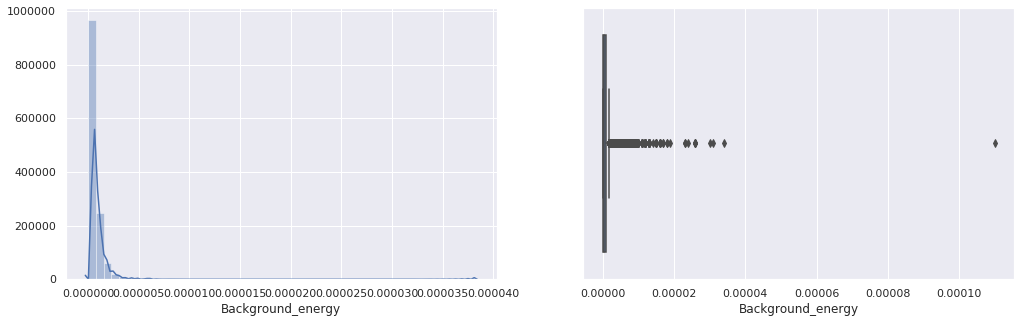

In [47]:
# Background_energy
sns.set(rc = {'figure.figsize':(17, 5)})
fig, ax = plt.subplots(1, 2)
sns.distplot(df_g['Background_energy'], ax = ax[0])
sns.boxplot(df['Background_energy'], ax = ax[1])
fig.show()

In [48]:
# Vamos a ver con más detalle los valores de la "cola", para ello intentaremos dividir la distribución en tramos,
# entre el máximo y el mínimo
cond1 = (df_g['Background_energy'] >= 1e-10) & (df_g['Background_energy'] < 1e-9) 
cond2 = (df_g['Background_energy'] >= 1e-9) & (df_g['Background_energy'] < 1e-8) 
cond3 = (df_g['Background_energy'] >= 1e-8) & (df_g['Background_energy'] < 1e-7)
cond4 = (df_g['Background_energy'] >= 1e-7) & (df_g['Background_energy'] < 1e-6) 
cond5 = (df_g['Background_energy'] >= 1e-6) & (df_g['Background_energy'] < 1e-5) 
cond6 = (df_g['Background_energy'] >= 1e-5) 

print(len(df_g[cond1]), len(df_g[cond2]), len(df_g[cond3]), len(df_g[cond4]), len(df_g[cond5]), len(df_g[cond6]))

14 175 1163 3818 1077 1


In [49]:
# Vamos a quitar el valor por arriba
df_g.drop(df_g[df_g['Background_energy'] > 1e-5].index, inplace =True)

In [50]:
# Y también algunos que se escapan por abajo
df_g.drop(df_g[df_g['Background_energy'] < 1e-9].index, inplace =True)

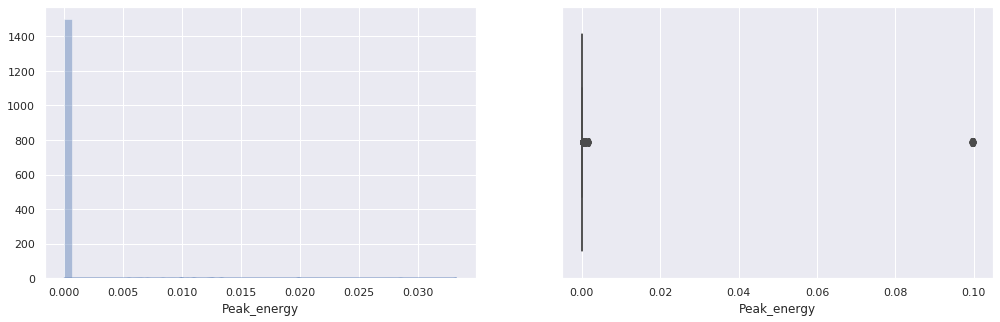

In [51]:
# Peak_energy
sns.set(rc = {'figure.figsize':(17, 5)})
fig, ax = plt.subplots(1, 2)
sns.distplot(df_g['Peak_energy'], ax = ax[0])
sns.boxplot(df['Peak_energy'], ax = ax[1])
fig.show()

In [52]:
# Tramos
cond1 = (df_g['Peak_energy'] >= 1e-9) & (df_g['Peak_energy'] < 1e-8) 
cond2 = (df_g['Peak_energy'] >= 1e-8) & (df_g['Peak_energy'] < 1e-7) 
cond3 = (df_g['Peak_energy'] >= 1e-7) & (df_g['Peak_energy'] < 1e-6) 
cond4 = (df_g['Peak_energy'] >= 1e-6) & (df_g['Peak_energy'] < 1e-5) 
cond5 = (df_g['Peak_energy'] >= 1e-5) & (df_g['Peak_energy'] < 1e-4) 
cond6 = (df_g['Peak_energy'] >= 1e-4) & (df_g['Peak_energy'] < 1e-3) 
cond7 = (df_g['Peak_energy'] >= 1e-3) & (df_g['Peak_energy'] < 1e-2) 
cond8 = (df_g['Peak_energy'] >= 1e-2)  

print(len(df_g[cond1]), len(df_g[cond2]), len(df_g[cond3]), len(df_g[cond4]), len(df_g[cond5]), len(df_g[cond6]),
     len(df_g[cond7]), len(df_g[cond8]))

1 119 2795 2946 335 17 7 13


In [53]:
# Quitamos los valores más altos por arriba
df_g.drop(df_g[df_g['Peak_energy'] > 1e-4].index, inplace = True)

In [54]:
# Y el valor que más se pierde por abajo
df_g.drop(df_g[df_g['Peak_energy'] < 1e-8].index, inplace = True)

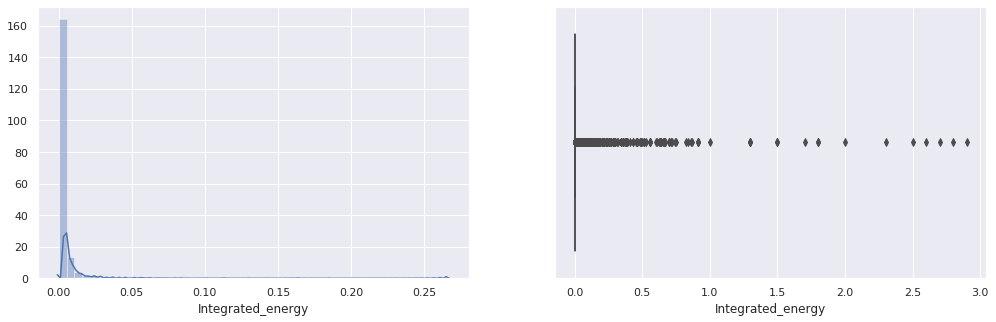

In [55]:
# Integrated_enery
sns.set(rc = {'figure.figsize':(17, 5)})
fig, ax = plt.subplots(1, 2)
sns.distplot(df_g['Integrated_energy'], ax = ax[0])
sns.boxplot(df['Integrated_energy'], ax = ax[1])
fig.show()

In [57]:
# Tramos
cond1 = (df_g['Integrated_energy'] >= 1e-5) & (df_g['Integrated_energy'] < 1e-4) 
cond2 = (df_g['Integrated_energy'] >= 1e-4) & (df_g['Integrated_energy'] < 1e-3)
cond3 = (df_g['Integrated_energy'] >= 1e-3) & (df_g['Integrated_energy'] < 1e-2)
cond4 = (df_g['Integrated_energy'] >= 1e-2) & (df_g['Integrated_energy'] < 1e-1)
cond5 = (df_g['Integrated_energy'] >= 1e-1) & (df_g['Integrated_energy'] < 1)
cond6 = (df_g['Integrated_energy'] >= 1) 

print(len(df_g[cond1]), len(df_g[cond2]), len(df_g[cond3]), len(df_g[cond4]), len(df_g[cond5]), len(df_g[cond6]))

518 2609 2706 348 14 0


In [58]:
# En este caso quitaremos los valores que más se van por arriba
df_g.drop(df_g[df_g['Integrated_energy'] > 0.1].index, inplace = True)

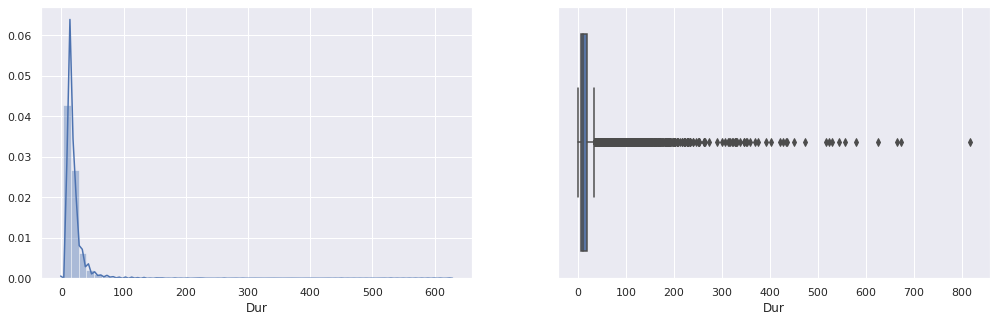

In [59]:
# Dur
sns.set(rc = {'figure.figsize':(17, 5)})
fig, ax = plt.subplots(1, 2)
sns.distplot(df_g['Dur'], ax = ax[0])
sns.boxplot(df['Dur'], ax = ax[1])
fig.show()

In [60]:
# Tomamos 250 como valor "prudente" y eliminamos a partir de este
df_g.drop(df_g[df_g['Dur'] > 250].index, inplace = True)

In [61]:
# Guardamos el resultado
df_g.to_csv('Flares_new.csv', index = False)